# Clustering on Customer Data

# Hierarchical Clustering

## Import Libraries & DataSets

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  

import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_data = pd.read_csv('shopping_data.csv')  
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data.shape

(200, 5)

In [4]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data = customer_data.iloc[:, 3:5].values

## Run Dendogram based hierarchial clustering

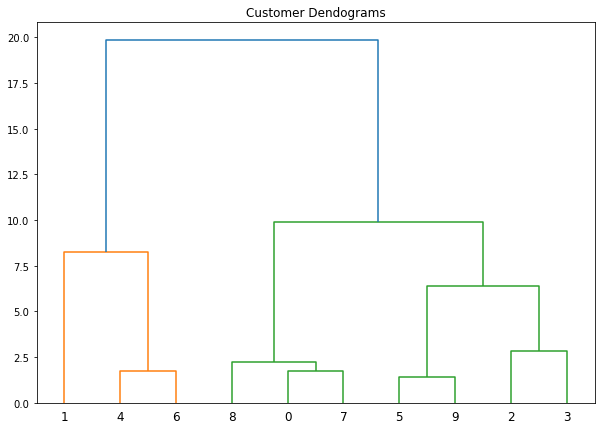

In [24]:
import scipy.cluster.hierarchy as hierarchy

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = hierarchy.dendrogram(hierarchy.linkage(data, method='ward'))  #single, complete, average, ward

## Predict the clusters for the observations 

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean')  #n_clusters = k value = 5
cluster.fit_predict(data)  

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

## Plot the clusters

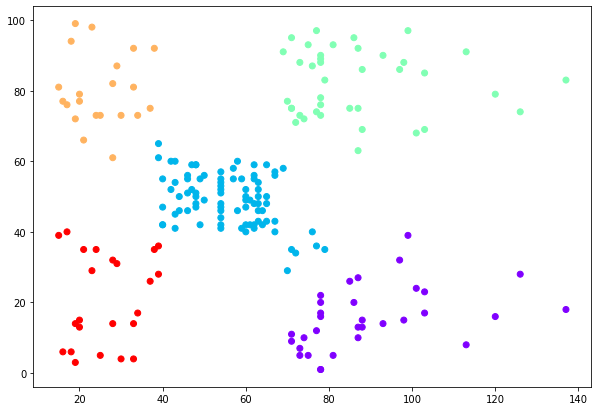

In [8]:
#Plot all the points of Annual income and spending score and then shade them by the predictions obtained for them

plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')  


# K-Means Clustering

## Import Libraries and Dataset

In [9]:
#importing the dataset
dataset = pd.read_csv('Cust_Spend_Data.csv')
dataset.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [10]:
dataset1 = dataset.drop('Cust_ID', axis = 1)
# peeking at the dataset
dataset1.head()

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,A,10000,2,1,1,0
1,B,7000,3,0,10,9
2,C,7000,7,1,3,4
3,D,6500,5,1,1,4
4,E,6000,6,0,12,3


In [11]:
#Descriptive stats of the variables in data
dataset1.describe()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,10.000000,10.000000,10.000000,10.0000,10.00000
mean,4850.000000,4.000000,0.300000,4.3000,4.00000
std,2877.595447,1.699673,0.483046,4.6916,3.05505
min,1000.000000,2.000000,0.000000,1.0000,0.00000
25%,2500.000000,3.000000,0.000000,1.0000,2.00000
50%,5000.000000,3.500000,0.000000,1.5000,3.50000
75%,6875.000000,5.000000,0.750000,8.2500,6.25000
max,10000.000000,7.000000,1.000000,12.0000,9.00000


In [12]:
dataset1.shape

(10, 6)

## Feature Scaling

In [13]:
data = dataset1.iloc[:, 2:6].values  #standardize the data to normal distribution
from sklearn.preprocessing  import StandardScaler
ss = StandardScaler()
dataset1_standardized = ss.fit_transform(data)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

## WSS Plot or Elbow Curve for Optimal cluster identification

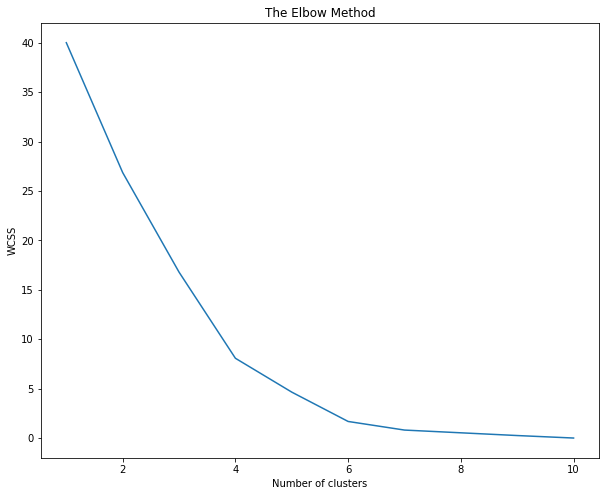

In [14]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)     #kmeans.inertia_  is the method to calculate Within Cluster Sum of Squares (WSS or WCSS)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means Clustering & Cluster Information

In [15]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans)
# Adding cluster to the Dataset1
dataset1['cluster'] = cluster
dataset1.head()

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
0,A,10000,2,1,1,0,0
1,B,7000,3,0,10,9,2
2,C,7000,7,1,3,4,0
3,D,6500,5,1,1,4,0
4,E,6000,6,0,12,3,1


In [16]:
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
cluster,,,,,
0,7833.3,4.7,1.0,1.7,2.7
1,4250.0,5.5,0.0,11.5,2.5
2,3300.0,3.0,0.0,3.0,5.4


In [17]:
#Observing the first cluster
cluster_0 = dataset1[dataset1['cluster'] == 0]
cluster_0

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
0,A,10000,2,1,1,0,0
2,C,7000,7,1,3,4,0
3,D,6500,5,1,1,4,0


In [18]:
cluster_0.shape

(3, 7)

In [19]:
#Observing the second cluster
cluster_1 = dataset1[dataset1['cluster'] == 1]
cluster_1

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
4,E,6000,6,0,12,3,1
6,G,2500,5,0,11,2,1


In [20]:
cluster_1.shape

(2, 7)

In [21]:
#Observing the third cluster
cluster_2 = dataset1[dataset1['cluster'] == 2]
cluster_2

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
1,B,7000,3,0,10,9,2
5,F,4000,3,0,1,8,2
7,H,2500,3,0,1,1,2
8,I,2000,2,0,2,2,2
9,J,1000,4,0,1,7,2


In [22]:
cluster_2.shape

(5, 7)

In [23]:
kmeans.labels_

array([0, 2, 0, 0, 1, 2, 1, 2, 2, 2])